# Generate scRNA-Seq data using scBoolSeq

Extends https://github.com/bnediction/scBoolSeq-supplementary/blob/main/synthetic%20scRNA-Seq%20from%20Random%20Network.ipynb

In [1]:
import mpbn
import booleantraces as btrace

import pandas as pd

In [2]:
output_prefix = "../ground-truth/"
!mkdir -p {output_prefix}

### Load synthetic Boolean network and associated configurations

# computing graph layout...


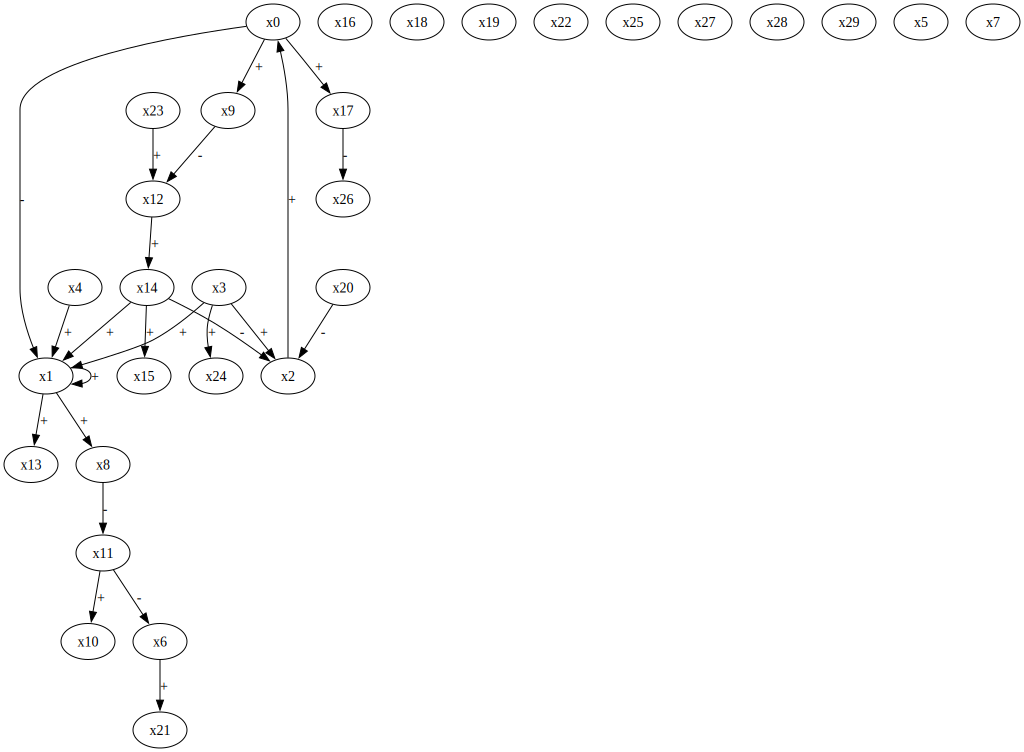

In [3]:
f = mpbn.load("boolean-network.bnet")
f_ig = f.influence_graph()
f_ig

In [4]:
f.save(output_prefix + "boolean-network.bnet")

In [5]:
with open(output_prefix + "influence-graph.sif", "w") as fp:
    for a, b, d in f_ig.edges(data=True):
        print(a, "activates" if d["sign"] > 0 else "inhibits", b, file=fp)

In [8]:
confs = pd.read_csv("configurations.csv", index_col=0)
confs.head()

,steady3,bifurcation,init,steady2,steady1
x0,0,0,0,0,1
x2,0,0,1,0,1
x3,0,0,1,0,0
x4,0,1,1,0,0
x7,0,0,0,0,0


In [9]:
confs = confs.to_dict()

## Generation of Boolean trajectories

In [10]:
wt_pairs = [("init", "steady1"),
            ("init", "bifurcation"),
                ("bifurcation", "steady2"),
                ("bifurcation", "steady3")]
traj_df = pd.concat([btrace.labelled_trajectory(f, confs[a], confs[b], a, b) for (a,b) in wt_pairs])
traj_df = traj_df.drop_duplicates()
traj_df.shape

Grounding...done in 0.1s
Grounding...done in 0.0s
Grounding...done in 0.0s
Grounding...done in 0.0s


(52, 30)

In [11]:
traj_df.to_csv(output_prefix + "wt-boolean-trajectories.csv")

In [13]:
def make_mutant(**spec):
    print(spec)
    f_mut = f.copy()
    for k, v in spec.items():
        f_mut[k] = v
    x0 = confs["init"] | spec
    label = "".join(f"{k}{'UP' if v else 'KO'}" for k,v in spec.items())
    traj_df = pd.concat([btrace.labelled_trajectory(f, x0, fp, "init", f"steady{i+1}") for i, fp in enumerate(f_mut.fixedpoints(reachable_from=x0))])
    traj_df.to_csv(f"{output_prefix}{label}-boolean-trajectories.csv")
    return traj_df.shape

In [14]:
for n in ["x1", "x2", "x9", "x14", "x7"]:
    make_mutant(**{n: 0})

{'x1': 0}
Grounding...done in 0.1s
Grounding...done in 0.0s
{'x2': 0}
Grounding...done in 0.0s
Grounding...done in 0.0s
{'x9': 0}
Grounding...done in 0.0s
Grounding...done in 0.0s
{'x14': 0}
Grounding...done in 0.0s
{'x7': 0}
Grounding...done in 0.0s
Grounding...done in 0.0s
Grounding...done in 0.0s


In [15]:
make_mutant(x1=1, x2=0)

{'x1': 1, 'x2': 0}
Grounding...done in 0.0s


(17, 30)

In [16]:
make_mutant(x1=1, x2=1)

{'x1': 1, 'x2': 1}
Grounding...done in 0.0s


(20, 30)

In [17]:
make_mutant(x1=0, x2=1)

{'x1': 0, 'x2': 1}
Grounding...done in 0.0s


(20, 30)

In [18]:
make_mutant(x1=0, x2=0)

{'x1': 0, 'x2': 0}
Grounding...done in 0.0s


(17, 30)